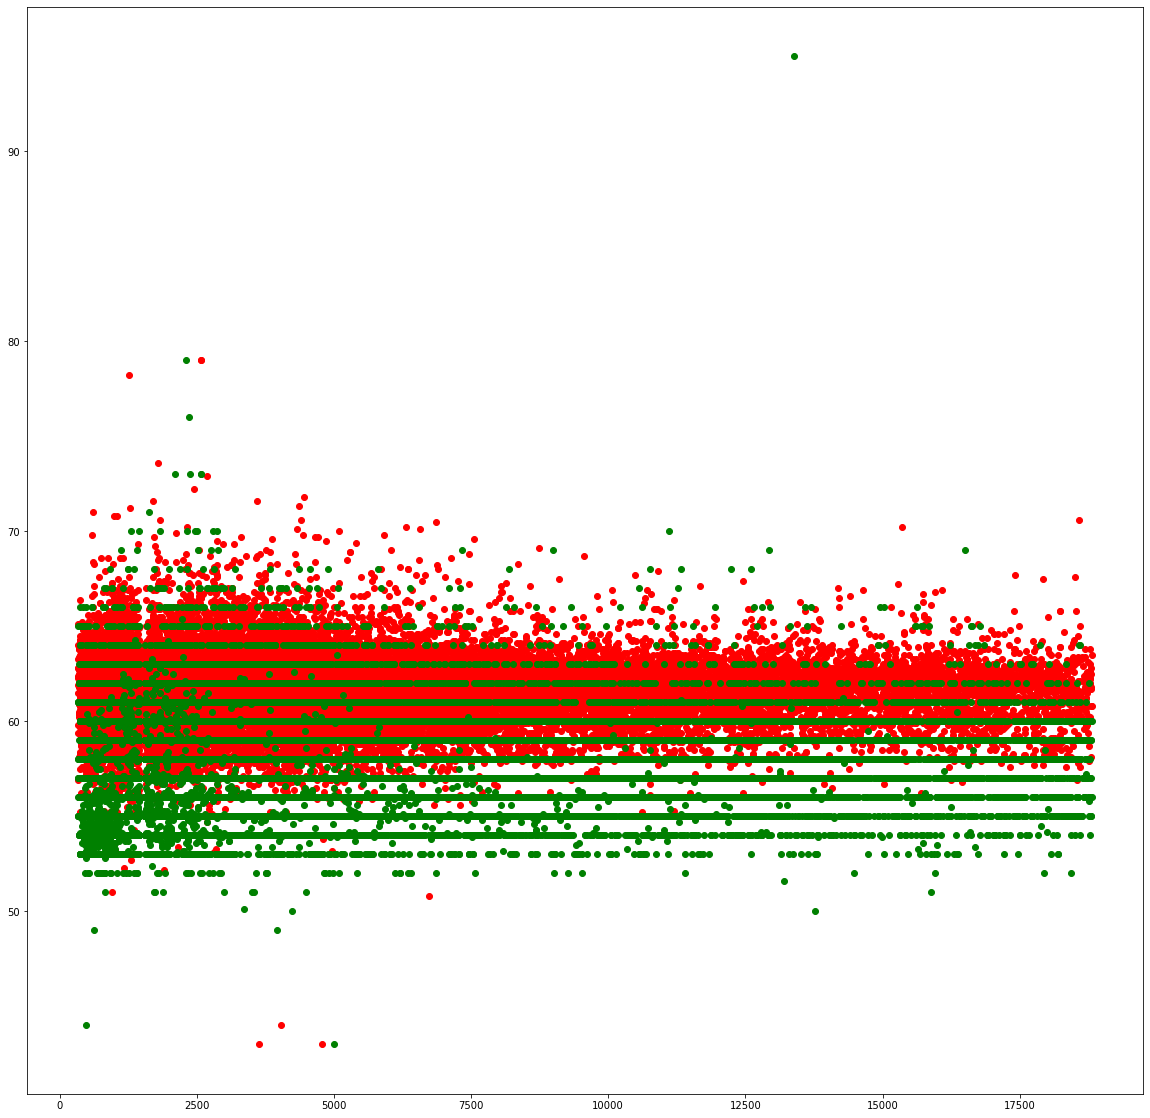

C:\Users\Adejumo Temiloluwa\anaconda3new\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


316019.1298948386
273.4894432913696


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pickle
#loading the data
df = pd.read_csv('Diamondprices.csv')
#encoding the feature labels
scaler_mapper = {'Ideal':1, 'Premium': 2, 'Very Good': 3, 'Good':4, 'Fair':5,
      'G': 1, 'E': 2, 'F':3, 'H': 4, 'D':5, 'I':6, 'J':7,
      'SI1':1, 'VS2':2, 'SI2':3, 'VS1':4, 'VVS2':5,'VVS1':6,'IF':7,'I1':8}
df = df.replace(scaler_mapper)
#Specifying theinput and output variables
X = df.drop(columns = ['price'])
y = df['price']
#splitting the variable into train, test and validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0, test_size = 0.2)
#data visualization
plt.figure(figsize=(20, 20))
plt.scatter( df['price'],df['depth'], c = 'r')
plt.scatter( df['price'],df['table'], c = 'g')
plt.show()
#calling the model
regressor = xgb.XGBRegressor(n_estimators = 50, reg_lambda = 5, gamma = 0, max_depth = 25)
#fitting the model
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_pred = regressor.predict(X_val)
#model validation
print(mean_squared_error(y_val,val_pred))
print(mean_absolute_error(y_val,val_pred))

In [31]:
#saving the model as a json file to be used for web app
pickle.dump(regressor, open('diamond price model.json', 'wb'))